# ROC-curve


#### first try with avaiable data from the neural network model


In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
from pandas_profiling import ProfileReport
from sklearn import preprocessing


from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import f1_score


sns.set()

In [3]:
sample = pd.read_csv("sample_submission.csv")

test = pd.read_csv("test.csv")

df = pd.read_csv("train.csv")

In [26]:
df_model6 = df.copy()
df_model6.set_index('Access_ID', inplace = True)
df_model6 = df_model6.drop(['Country', 'Browser'], axis=1)
features6 = list(df_model6.columns)
df_model6['Date'] = pd.to_datetime(df_model6['Date'])
df_model6['month'] = df_model6['Date'].dt.month
df_model6 = df_model6.drop(['Date'], axis=1)
categorical_features = ['OS','Type_of_Traffic','Type_of_Visitor','month']
ohc = OneHotEncoder(sparse=False, drop="first")
ohc_feat = ohc.fit_transform(df_model6[categorical_features])
ohc_feat_names = ohc.get_feature_names()
ohc_df = pd.DataFrame(ohc_feat, index=df_model6.index, columns=ohc_feat_names)  # Why the index=df_ohc.index?
df_model6 = pd.concat([df_model6.drop(columns=categorical_features), ohc_df], axis=1)
features6 = list(df_model6.columns)
scaler = MinMaxScaler()
scaled_feat = scaler.fit_transform(df_model6)
df_model6[features6] = scaled_feat

X = df_model6.drop('Buy', axis=1)
y = df_model6['Buy']

/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 10)

In [9]:
nn1 = MLPClassifier(random_state = 10, max_iter = 385).fit(X_train, y_train)
nn2 = MLPClassifier(random_state = 10, max_iter = 385, hidden_layer_sizes=(8)).fit(X_train, y_train)



/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (385) reached and the optimization hasn't converged yet.
  warnings.warn(
/opt/anaconda3/envs/Data_Mining_Project_2021/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (385) reached and the optimization hasn't converged yet.
  warnings.warn(


In [35]:
r_probs = [0 for _ in range(len(y_test))]
nn1_probs = nn1.predict_proba(X_test)
nn2_probs = nn2.predict_proba(X_test)

In [36]:
nn1_probs = nn1_probs[:, 1]
nn2_probs = nn2_probs[:, 1]

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
r_auc = roc_auc_score(y_test, r_probs)
nn1_auc = roc_auc_score(y_test, nn1_probs)
nn2_auc = roc_auc_score(y_test, nn2_probs)

In [39]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('NN1: AUROC = %.3f' % (nn1_auc))
print('NN2: AUROC = %.3f' % (nn2_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 0.908
Naive Bayes: AUROC = 0.912


In [41]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
nn1_fpr, nn1_tpr, _ = roc_curve(y_test, nn1_probs)
nn2_fpr, nn2_tpr, _ = roc_curve(y_test, nn2_probs)

array([0.29347395, 0.00031816, 0.00453702, ..., 0.03803462, 0.00050965,
       0.00041271])

In [42]:
import matplotlib.pyplot as plt

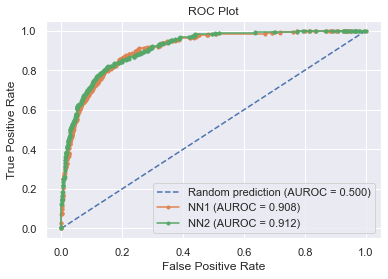

In [51]:
%matplotlib inline

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(nn1_fpr, nn1_tpr, marker='.', label='NN1 (AUROC = %0.3f)' % nn1_auc)
plt.plot(nn2_fpr, nn2_tpr, marker='.', label='NN2 (AUROC = %0.3f)' % nn2_auc)


# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()